# Lecture 23: Logistical Regression - Diganostics

---

## Ex-Ante Diagnostics

The example below employs the Indian Time Use Survey to model the choice of shopping channel (no-shopping, in-store, online, both) as logistic regression, accounting for individual specific variables (socio-demographics and socio-economic parameters).

In [ ]:
# Load necessary libraries
library(nnet)
library(dplyr)
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 8)

# 2024 ITUS Individual Data (model)
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS-IND-MD.csv"
data <- read.csv(url) # Loading Data
str(data)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




None: 409897 
In-Store: 39728 
Online: 4252 
Both: 315 


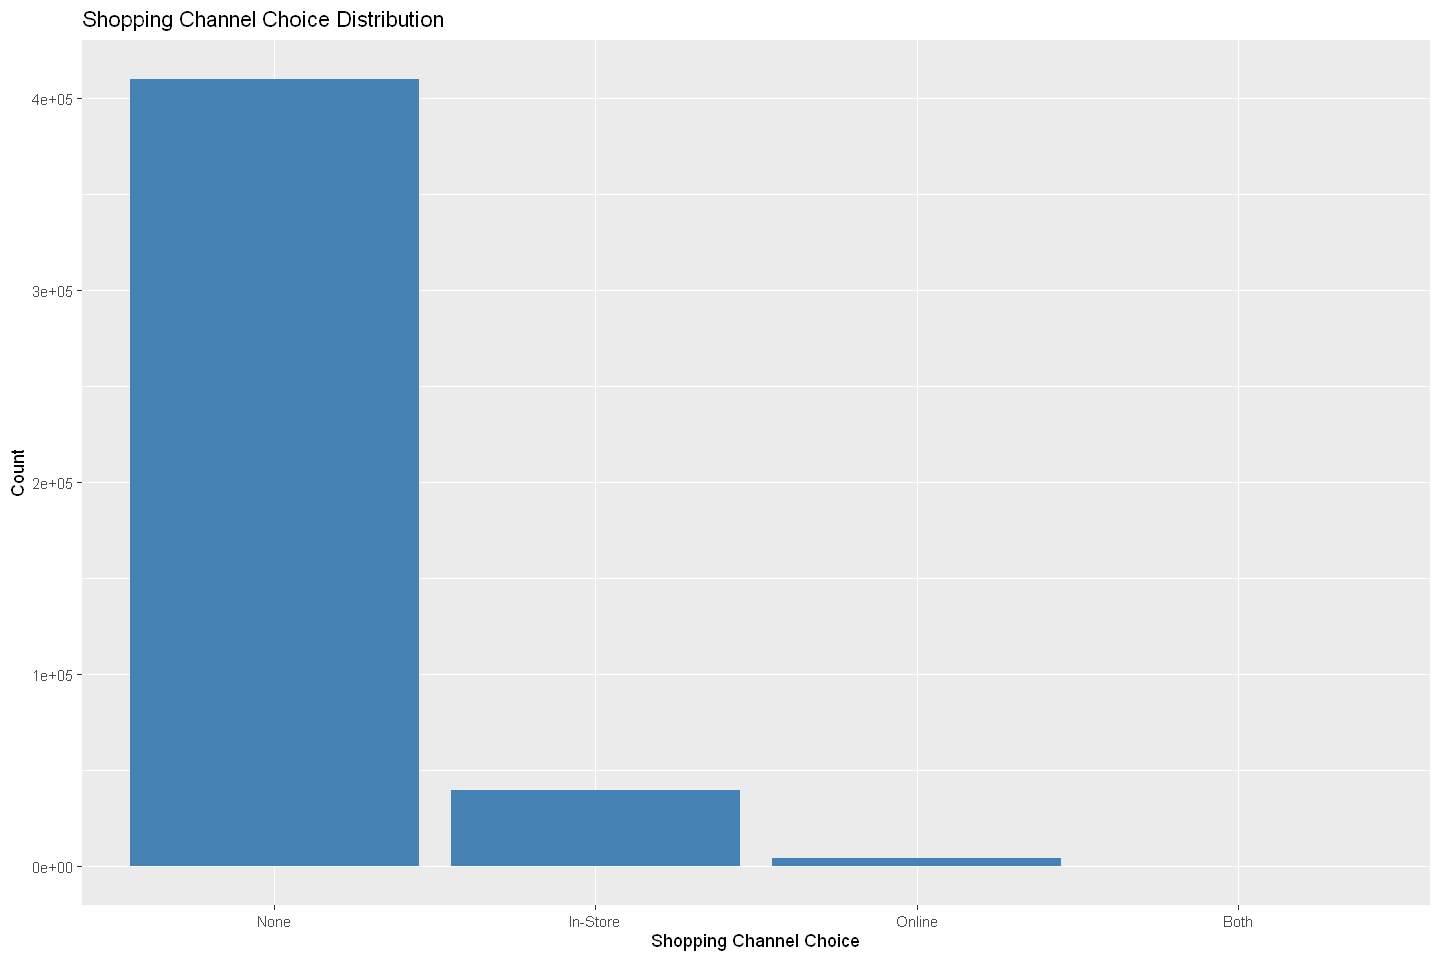

In [3]:
# Endogenous Variable: Shopping Channel Choice (None: 0, In-Store: 1, Online: 2, or Both: 3)
count <- table(data$shopping_choice)
cat("None:", count[1], "\n")
cat("In-Store:", count[2], "\n")
cat("Online:", count[3], "\n")
cat("Both:", count[4], "\n")
# Create a bar plot for Shopping Channel Choice
ggplot(data, aes(x = factor(shopping_choice, levels = 0:3, labels = c("None", "In-Store", "Online", "Both")))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Shopping Channel Choice Distribution",
       x = "Shopping Channel Choice",
       y = "Count")

In [ ]:
# Model
# Reshape to long format
data <- data %>% mutate(shopping_choice = as.numeric(as.character(shopping_choice)))
data <- data %>%
  slice(rep(1:n(), each = length(0:3))) %>%
  mutate(alternative = rep(0:3, times = nrow(data)),
         choice = (alternative == shopping_choice))